# CIFAR-10
- Loading Libraries
- Data Preprocessing
- Data Visualization
- Classification Algorithm CNN
- Results 
- Overall Output

## Loading Libraries

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten, Dense , Dropout
from keras.callbacks import ModelCheckpoint
from matplotlib import gridspec

Using TensorFlow backend.


## Data Preprocessing

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
print("Training dataset has {} training samples".format(len(y_train)))
print("Testing dataset has {} testing samples".format(len(y_test)))
print("The shape of dataset is {} for images and {} for labels".format(x_train.shape[1:], y_train.shape[1:]))

Training dataset has 50000 training samples
Testing dataset has 10000 testing samples
The shape of dataset is (32, 32, 3) for images and (1,) for labels


There are 10 classes in CIFAR-10 the list is made accordingly

In [4]:
classes = ["Airplane", "Automobile" , "Bird" , "Cat" , "Deer" , "Dog" , "Frog" , "Horse" , "Ship" , "Truck"]

Filtering the data according to the labels

In [5]:
airplane = []
automobile = []
bird = []
cat = []
deer = []
dog = []
frog = []
horse = []
ship = []
truck = []
cifar = [airplane , automobile , bird , cat , deer , dog , frog , horse , ship , truck]

In [6]:
# Making data into executable formate
y_train= y_train.ravel()
y_test = y_test.ravel()

In [7]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
for i in range(len(y_train)):
    value = y_train[i]
    cifar[value].append(x_train[i])
for i in range(len(y_test)):
    value = y_train[i]
    cifar[value].append(x_train[i])

In [9]:
for i in range(len(cifar)):
    print("Number of samples of {}  =  {} ".format(classes[i], len(cifar[i])))

Number of samples of Airplane  =  6005 
Number of samples of Automobile  =  5974 
Number of samples of Bird  =  6032 
Number of samples of Cat  =  6016 
Number of samples of Deer  =  5999 
Number of samples of Dog  =  5937 
Number of samples of Frog  =  6030 
Number of samples of Horse  =  6001 
Number of samples of Ship  =  6025 
Number of samples of Truck  =  5981 


Making labels of the training executable for the model.

In [10]:
y_train_bin = np_utils.to_categorical(y_train, len(classes))
y_test_bin = np_utils.to_categorical(y_test, len(classes))

In [11]:
print("The machine can easily classify with binary format of data for example {}".format(y_train_bin[0]))

The machine can easily classify with binary format of data for example [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Extracting some data for validation testing 

In this model we are taking 10000 samples for validation testing

In [12]:
x_train,x_valid = x_train[10000:], x_train[:10000]
y_train_bin,y_valid = y_train_bin[10000:], y_train_bin[:10000]
y_train = y_train[10000:]

Shapes of the modified dataset is

In [13]:
print("Number of traing samples are :")
print("Images = " , x_train.shape)
print("Labels = " , y_train_bin.shape)
print("Number of testing examples are : ")
print("Images = " , x_test.shape)
print("Lables = ", y_test.shape)
print("Number of Validation examples are : ")
print("Images = " , x_valid.shape)
print("Labels = ", y_valid.shape)

Number of traing samples are :
Images =  (40000, 32, 32, 3)
Labels =  (40000, 10)
Number of testing examples are : 
Images =  (10000, 32, 32, 3)
Lables =  (10000,)
Number of Validation examples are : 
Images =  (10000, 32, 32, 3)
Labels =  (10000, 10)


## Data Visualization

We are defining a function. With the help of this function you can visualize the images of each class.The number of rows and column is decided by the user

In [14]:
def Visualization():
    row = int(input("Enter the value of row = "))
    column = int(input("Enter the value of Column = "))
    print(classes)
    number = int(input("Enter the class number starting from 0= "))
    value = np.random.randint(0,5000)
    if(value < row*column):
        print("Please try with some lower values")
    else:    
        fig = plt.figure(figsize=(10 , 10))
        plt.gca().set_title(classes[number])
        plt.axis("off")
        for i in range(row * column):
            ax = fig.add_subplot(row,column, i+1, xticks=[], yticks=[])
            ax.imshow(cifar[number][i+value])

Enter the value of row = 4
Enter the value of Column = 4
['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
Enter the class number starting from 0= 0


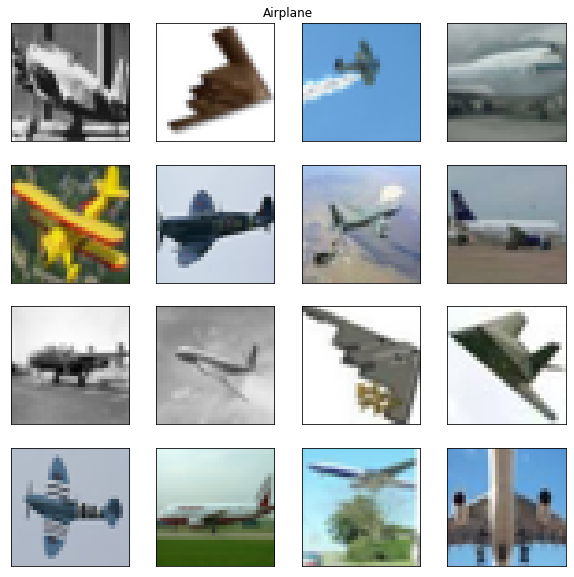

In [15]:
Visualization()

You can visualize the data. Just uncomment the below code block and execute the function. This function will give random images of a particular class.

In [16]:
#Visualization()

## Preparing CNN Model for Classification

In [17]:
model=Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=5,input_shape=(32,32,3),activation="relu"))
model.add(Conv2D(kernel_size=(2,2),filters=10,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2),filters=5,activation="relu"))
model.add(Conv2D(kernel_size=(4,4),filters=10,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(1,1),strides=(2,2),filters=10))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(5000,activation="relu"))
model.add(Dense(1000,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()

filepath="./saved_models/best_model_6k96_ignore.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model.compile(optimizer="adadelta",loss="categorical_crossentropy",metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 5)         140       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 10)        210       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 5)         205       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 10)        810       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 10)         

In [18]:
history = model.fit(x_train,y_train_bin, validation_data=(x_valid,y_valid),batch_size=64,epochs=5,callbacks=[checkpoint])

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 10s 246us/step - loss: 1.9380 - accuracy: 0.3096 - val_loss: 1.6469 - val_accuracy: 0.4084
Epoch 2/5
 1024/40000 [..............................] - ETA: 7s - loss: 1.7613 - accuracy: 0.3623

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


40000/40000 [==============================] - 7s 184us/step - loss: 1.6424 - accuracy: 0.4160 - val_loss: 1.5475 - val_accuracy: 0.4447
Epoch 3/5
40000/40000 [==============================] - 7s 179us/step - loss: 1.5070 - accuracy: 0.4669 - val_loss: 1.4344 - val_accuracy: 0.4890
Epoch 4/5
40000/40000 [==============================] - 7s 181us/step - loss: 1.3927 - accuracy: 0.5102 - val_loss: 1.3250 - val_accuracy: 0.5346
Epoch 5/5
40000/40000 [==============================] - 7s 184us/step - loss: 1.3057 - accuracy: 0.5400 - val_loss: 1.2893 - val_accuracy: 0.5473


## Testing of Classification Algorithm CNN

In [19]:
def Testing():
    def get_preds(x,model):
        x = np.reshape(x,(1,32,32,3))
        pr = model.predict(x)    
        pr = np.array(pr)[0]
        idx = np.argmax(pr)
        conf = round(pr[idx]*100,2)
        lab = classes[idx]
        return lab,conf,idx
    
    plt.figure(figsize = (20,20))
    gs1 = gridspec.GridSpec(3, 3)
    gs1.update(wspace=0.025, hspace=0.5)
    padding = 5
    value = np.random.randint(0, 950)
    for i in range(0, 9):
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
        ax1 = plt.subplot(gs1[i])
        ax1.axis("off")
        pr,conf,idx = get_preds(x_test[i+value],model)
    
        ax1.annotate(
        s = '{0}:{1}% ({2})'.format(pr,conf , classes[y_test[i+value]]),
        color=("green" if idx == y_test[i+value] else "red"),
        fontsize = 15,
        xy=(0, 0), 
        xytext=(padding-1, -(padding-1)), 
        textcoords = 'offset pixels',
        bbox=dict(facecolor='white', alpha=1, pad=padding),
        va='top',
        ha='left',
        )
        ax1.imshow(x_test[i+value])

To test the function , execute the below function

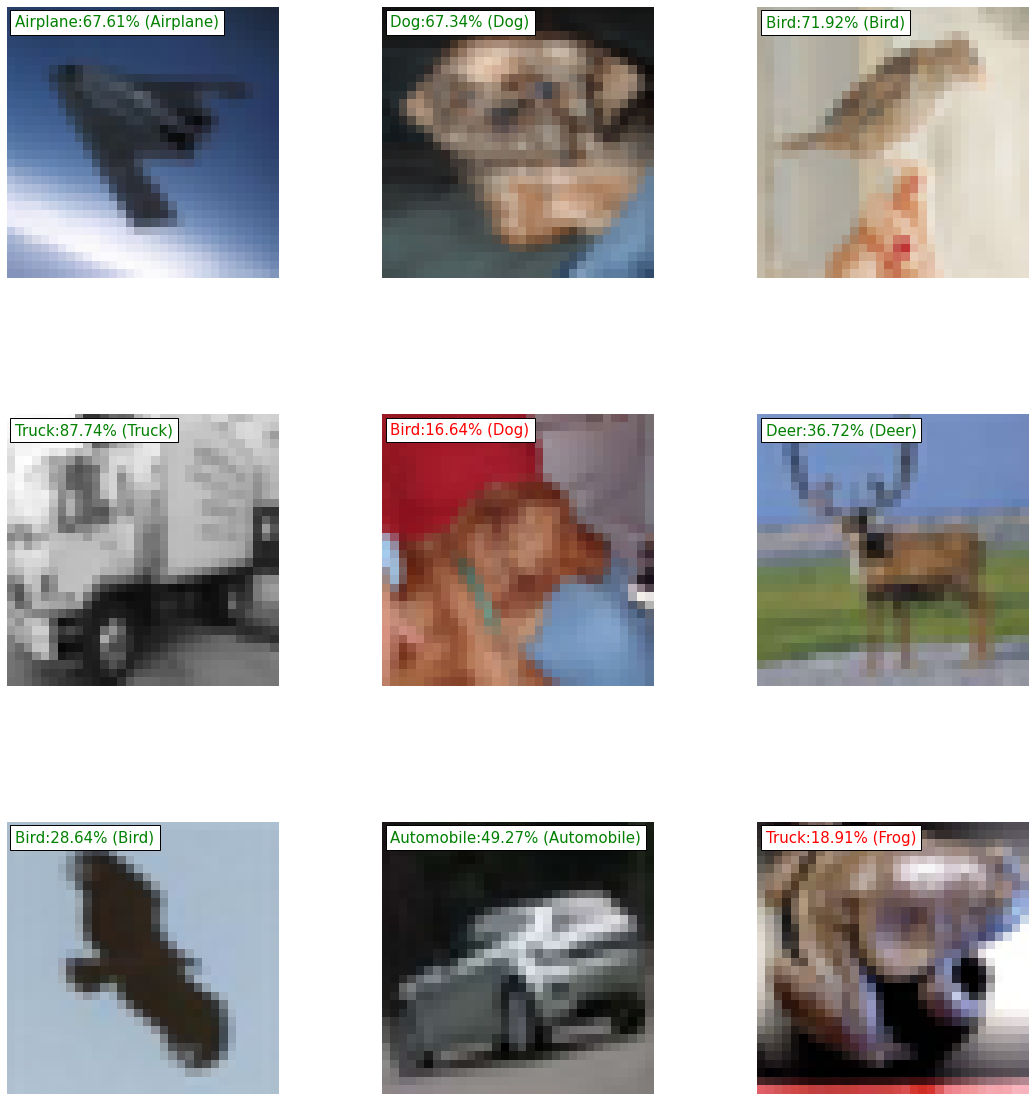

In [20]:
Testing()

## Results and Evaluation

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


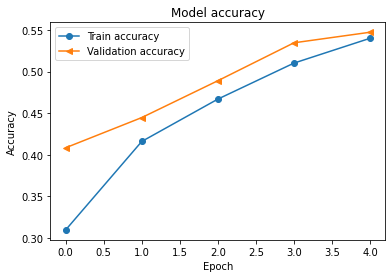

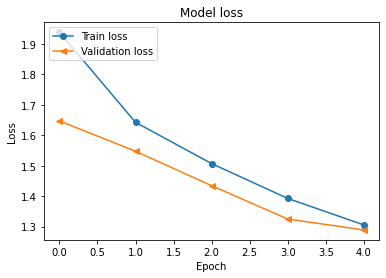

In [21]:
def Results():
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'], marker = "o")
    plt.plot(history.history['val_accuracy'], marker = "<")
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train accuracy', 'Validation accuracy'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'], marker = "o")
    plt.plot(history.history['val_loss'] , marker = "<")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper left')
    plt.show()
Results()

In [22]:
accuracy= model.evaluate(x_test, y_test_bin)

10000/10000 [==============================] - 1s 105us/step


## Final Output Function

In [23]:
def main():
    print("You can check all the possible dunction here as well")
    print("Press 1 for data visualization")
    print("Press 2 for Testing the model")
    print("Press 3 for Results ")
    print("Press 4 to check the accuracy")
    number = int(input("Enter the number here = "))
    if(number == 1):
        Visualization()
    elif(number == 2):
        Testing()
    elif(number == 3):
        Results()
    elif(number == 4):
        print("Accuracy is = {}%".format(round(accuracy[1]*100,2)))
    else:
        print("Incorrect input")

Just uncomment the below code block and execute the main function for overall project

In [24]:
#main() # uncomment this line